In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')   #to load dataset
df.head()   #to show first five records

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.shape #to check rows and columns

(1338, 8)

In [4]:
#how many samples of 1's and 0's in output column insuranceclaim

df['insuranceclaim'].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

In [5]:
f=df['insuranceclaim'].value_counts()  #frequency count


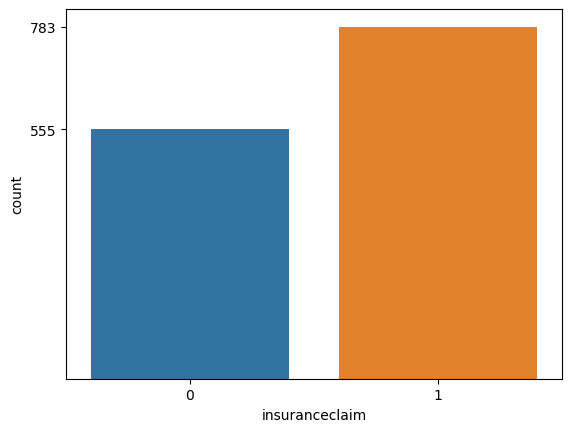

In [6]:
#visualise

sb.countplot(data=df, x='insuranceclaim')
plt.yticks(f)
plt.show()

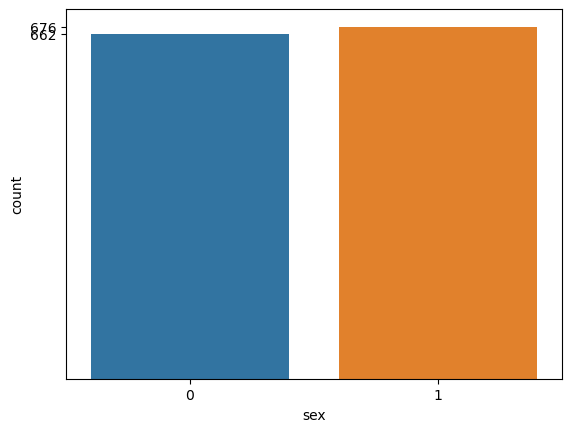

In [7]:
sb.countplot(data=df, x='sex')
f=df['sex'].value_counts()
plt.yticks(f)
plt.show()

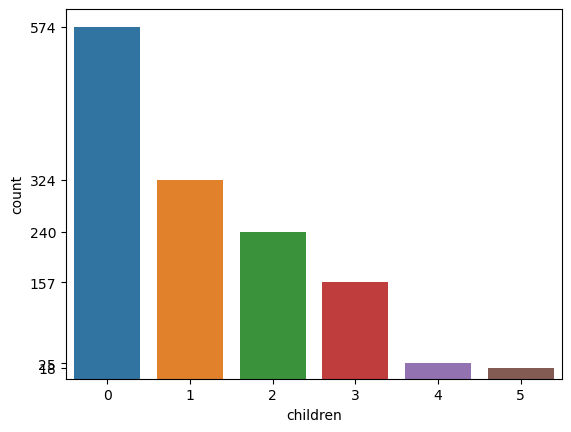

In [8]:
sb.countplot(data=df, x='children')
f=df['children'].value_counts()
plt.yticks(f)
plt.show()

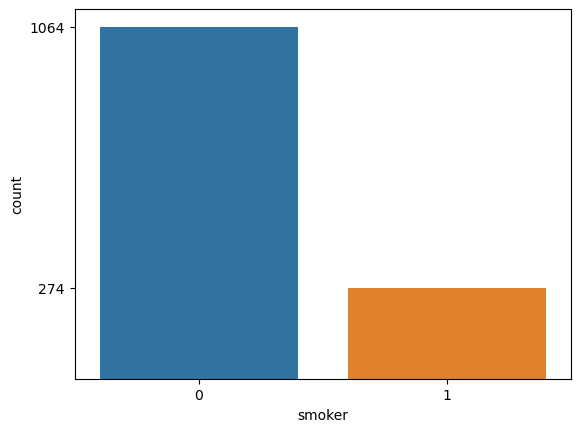

In [9]:
sb.countplot(data=df, x='smoker')
f=df['smoker'].value_counts()
plt.yticks(f)
plt.show()

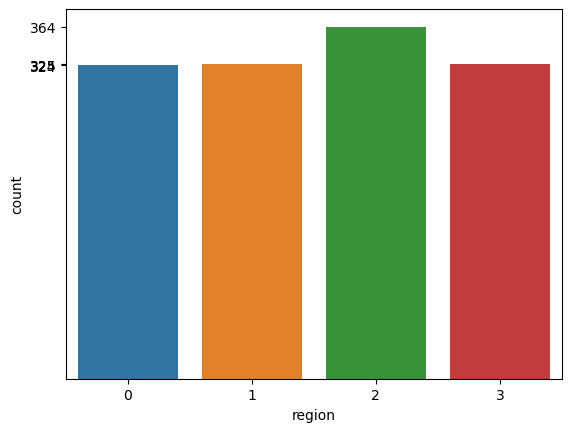

In [10]:
sb.countplot(data=df, x='region')
f=df['region'].value_counts()
plt.yticks(f)
plt.show()

In [11]:
#apply cleaning process means EDA

#to check null values

df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
df.dtypes #check datatype

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

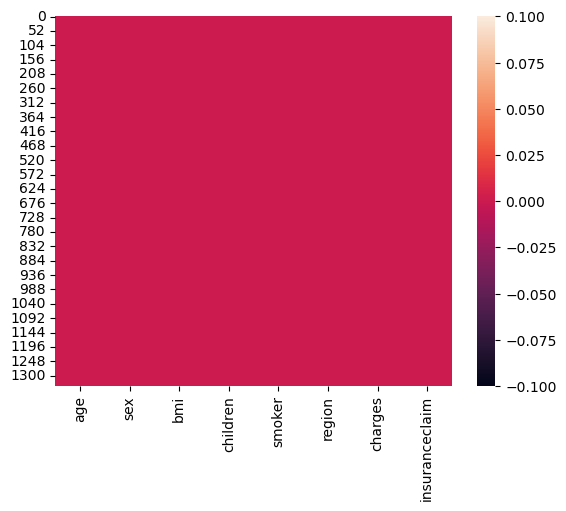

In [13]:
#visualise null values

sb.heatmap(df.isnull())
plt.show()

In [14]:
#to check duplicates row/records
df.duplicated().sum()

1

In [15]:
#to show duplicated records
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [16]:
#to remove duplicates row permanently
df.drop_duplicates(inplace=True)

In [17]:
#to cross check duplicate once again

df.duplicated().sum()

0

In [18]:
#Separate input column and output column from given dataset

X=df.drop('insuranceclaim',axis=1)
Y=df['insuranceclaim']

In [19]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [21]:
X.shape, Y.shape

((1337, 7), (1337,))

In [22]:
#apply train test split

from sklearn.model_selection import train_test_split


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [24]:
X_train.shape, Y_train.shape

((935, 7), (935,))

In [25]:
X_test.shape,Y_test.shape

((402, 7), (402,))

In [26]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [27]:
#apply scaling on input column of both X_train and X_test, use StandardScaler class

from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()   #creating object of StandardScaler Class
X_train= ss.fit_transform(X_train)   #applying scaling on training input X_train
X_test=ss.transform(X_test)   #applying scaling on testing input X_test

In [29]:
Y_train.value_counts()    

insuranceclaim
1    552
0    383
Name: count, dtype: int64

In [30]:
#here the dataset is balanced.

In [31]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [32]:
#create user defined function
def create_model(model):
    model.fit(X_train,Y_train) #train the model with 70% data
    #test the model with 30% data
    Y_pred=model.predict(X_test)
    #print confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    #generate classification report
    print(classification_report(Y_test,Y_pred))
    return model

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [34]:
#perform the model
#1.LogisticRegression
#call logistic regression inbuilt class
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()   #create the object of LogisticRegression Class

In [36]:
#call function 
lr=create_model(lr)

[[147  25]
 [ 21 209]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [37]:
#here recall score is important in this dataset and recall score = 0.91 means 91%
#it is good but not better
#reason behind of less socre : model is overfit
#because LogisticRegression cannot select input features automaticaly.

In [38]:
#second Classification Algorithm : DecisionTreeClassifier
#advantages : it can be select input features automatica with the help of Gini and Entropy Method


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc=DecisionTreeClassifier(random_state=1)

In [41]:
#call user defined function
dtc=create_model(dtc)

[[168   4]
 [  9 221]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [42]:
#create a df 
dict={'input columns':X.columns,'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


In [43]:
#in decisiontreeclassifier,we got score0.96 means 96% reason behind the score,model is overfit
#so we reduce overfiting the model, then use pruning technique of DecisionTreeClassifier class
#how to reduce overfitting situation by using the pruning technique:
#  1: max_dept: inbuilt parameter of DecisionTreeClassifier class
#  2.min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class

In [44]:
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
'''for i in range (1,9): #start=1 stop=9-1=8 step=+1
    #create object of DecisionTreeClassifier class and passing the parametrer max_dept
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMax depth: ",i)
    #call user defined function
    dtc1=create_model(dtc1)'''

'for i in range (1,9): #start=1 stop=9-1=8 step=+1\n    #create object of DecisionTreeClassifier class and passing the parametrer max_dept\n    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)\n    #i=1 then i=2 etc\n    #by default use method gini index\n    print("\nMax depth: ",i)\n    #call user defined function\n    dtc1=create_model(dtc1)'

In [45]:
#create the object of DecisionTreeClassifier class and passing the parameter max_depth=8
dtc1=DecisionTreeClassifier(random_state=1,max_depth=8)
#by default use method gini index
#call user defined function
dtc1=create_model(dtc1)

[[163   9]
 [ 13 217]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.96      0.94      0.95       230

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402



In [46]:
#create a df 
dict={'input columns':X.columns,'IG':dtc1.feature_importances_}   #IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,children,0.396539
1,bmi,0.300599
2,smoker,0.194738
3,age,0.081046
4,charges,0.027078
5,sex,0.000000
6,region,0.000000


In [47]:
#in above report, recall socre=0.94 means 94% and accuracy = 0.95 means 95%, DecisionTreeClassifier using Gini Index(max depth)

In [48]:
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#it is second pruning technique,leaf means no child
#value of min_samples_leaf parameter for any dataset >=45 and <=100
for i in range (45,101): #start=45 stop=101-1=100 step=+1
    #create object of DecisionTreeClassifier class and passing the parametr\er min_samples_leaf
    dtc1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMin_samples_leaf: ",i)
    #call user defined function
    dtc1=create_model(dtc1)


Min_samples_leaf:  45
[[153  19]
 [ 35 195]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       172
           1       0.91      0.85      0.88       230

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402


Min_samples_leaf:  46
[[153  19]
 [ 35 195]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       172
           1       0.91      0.85      0.88       230

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402


Min_samples_leaf:  47
[[153  19]
 [ 35 195]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       172
           1       0.91      0.85      0.88       230

    accuracy                           0.87 

In [49]:
#create the object of DecisionTreeClassifier class and passing the parameter min_samples_leaf=76
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=76)
#call user defined function
dtc2=create_model(dtc2)

[[121  51]
 [ 20 210]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       172
           1       0.80      0.91      0.86       230

    accuracy                           0.82       402
   macro avg       0.83      0.81      0.81       402
weighted avg       0.83      0.82      0.82       402



In [50]:
#create a dataframe
dict={"input columns": X.columns, "IG": dtc2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,children,0.345665
1,bmi,0.328685
2,smoker,0.166829
3,charges,0.092021
4,age,0.066800
5,sex,0.000000
6,region,0.000000


In [51]:
#in above report, recall socre=0.91 means 91% and accuracy = 0.82 means 82%, DecisionTreeClassifier using Gini Index(min samples leaf)

In [52]:
#use entropy method
#create object
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [53]:
#call function
dtc1=create_model(dtc1)

[[171   1]
 [  4 226]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



In [54]:
#create a df 
dict={'input columns':X.columns,'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


In [55]:
#in decisiontreeclassifier,we got score 0.98 means 98% reason behind the less score,model is overfit
#so we reduce overfiting the model, then use pruning technique of DecisionTreeClassifier class
#how to reduce overfitting situation by using the pruning technique:
#  1: max_dept: inbuilt parameter of DecisionTreeClassifier class
#  2.min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class

In [56]:
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
'''for i in range (1,9): #start=1 stop=9-1=8 step=+1
    #create object of DecisionTreeClassifier class and passing the parametrer max_dept
    dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMax depth: ",i)
    #call user defined function
    dtc1=create_model(dtc1)'''

'for i in range (1,9): #start=1 stop=9-1=8 step=+1\n    #create object of DecisionTreeClassifier class and passing the parametrer max_dept\n    dtc1=DecisionTreeClassifier(random_state=1,criterion=\'entropy\',max_depth=i)\n    #i=1 then i=2 etc\n    #by default use method gini index\n    print("\nMax depth: ",i)\n    #call user defined function\n    dtc1=create_model(dtc1)'

In [57]:
#create the object of DecisionTreeClassifier class and passing the parameter max_depth=7
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=7)
#by default use method gini index
#call user defined function
dtc1=create_model(dtc1)

[[170   2]
 [  3 227]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



In [58]:
#create a df 
dict={'input columns':X.columns,'IG':dtc1.feature_importances_}   #IG means information gain of each input
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,bmi,0.444781
1,children,0.271510
2,smoker,0.158502
3,age,0.085557
4,charges,0.039650
5,sex,0.000000
6,region,0.000000


In [59]:
#in above report, recall socre=0.99 means 99% and accuracy = 0.99 means 99%, DecisionTreeClassifier using Entropy Method(max depth)

In [60]:
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#it is second pruning technique,leaf means no child
#value of min_samples_leaf parameter for any dataset >=45 and <=100
'''for i in range (45,101): #start=45 stop=101-1=100 step=+1
    #create object of DecisionTreeClassifier class and passing the parameter min_samples_leaf
    dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMin_samples_leaf: ",i)
    #call user defined function
    dtc1=create_model(dtc1)'''

'for i in range (45,101): #start=45 stop=101-1=100 step=+1\n    #create object of DecisionTreeClassifier class and passing the parameter min_samples_leaf\n    dtc1=DecisionTreeClassifier(random_state=1,criterion=\'entropy\',min_samples_leaf=i)\n    #i=1 then i=2 etc\n    #by default use method gini index\n    print("\nMin_samples_leaf: ",i)\n    #call user defined function\n    dtc1=create_model(dtc1)'

In [61]:
#create the object of DecisionTreeClassifier class and passing the parameter min_samples_leaf=45
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#call user defined function
dtc2=create_model(dtc2)

[[160  12]
 [ 33 197]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       172
           1       0.94      0.86      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



In [62]:
#create a dataframe
dict={"input columns": X.columns, "IG": dtc2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,bmi,0.470769
1,children,0.297326
2,smoker,0.138001
3,age,0.069889
4,charges,0.024015
5,sex,0.000000
6,region,0.000000


In [63]:
#in above report, recall socre=0.86 means 86% and accuracy = 0.89 means 89%, DecisionTreeClassifier using Entropy Method(min samples leaf)

In [64]:
#Apply Ensembling Technique

#1.BootStraping method:
#RandomForestTree(use Bagging):

from sklearn.ensemble import RandomForestClassifier


In [65]:
#Randamforest classifier  inbuil inner class
'''for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No. of estimators means no. of Decision tree :',i)
    rfc=create_model(rfc)'''

"for i in range(10,101):\n    rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n    print('No. of estimators means no. of Decision tree :',i)\n    rfc=create_model(rfc)"

In [66]:
 rfc=RandomForestClassifier(n_estimators=23,random_state=1)
 rfc=create_model(rfc)

[[159  13]
 [ 10 220]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       172
           1       0.94      0.96      0.95       230

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402



In [67]:
#create a dataframe
dict={"input columns": X.columns, "IG": rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,bmi,0.355741
1,children,0.243664
2,charges,0.185629
3,age,0.097714
4,smoker,0.080570
5,region,0.024983
6,sex,0.011698


In [68]:
#In above report, recall score = 0.96 means 96% and Accuracy = 0.94 means 94%, using RandomForestClassifier

In [69]:
#Apply Next Ensembling Technique on same dataset 
#ADA Boost
#inbuilt class AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [70]:
'''for i in range(1,17):
    #create the object of class AdaBoostClassifier
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of Estimator :",i)
    
    #call user defined function
    ada=create_model(ada)'''

'for i in range(1,17):\n    #create the object of class AdaBoostClassifier\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No of Estimator :",i)\n    \n    #call user defined function\n    ada=create_model(ada)'

In [71]:
#create the object of class AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=9,random_state=1)
#call user defined function
ada=create_model(ada)

[[135  37]
 [ 16 214]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.84       172
           1       0.85      0.93      0.89       230

    accuracy                           0.87       402
   macro avg       0.87      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



In [72]:
#create a dataframe
dict={"input columns": X.columns, "IG": ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,bmi,0.444444
1,children,0.222222
2,smoker,0.222222
3,age,0.111111
4,sex,0.000000
5,region,0.000000
6,charges,0.000000


In [73]:
#In above report, recall score = 0.93 means 93% and Accuracy = 0.87 means 87%, using AdaBoostClassifier

In [74]:
#2.Gradient Boosting (GB):

from sklearn.ensemble import GradientBoostingClassifier

In [75]:
'''for i in range(10,101):
    #create the object of class GradientBoostingClassifier
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of Estimator :",i)
    
    #call user defined function
    gbc=create_model(gbc)'''

'for i in range(10,101):\n    #create the object of class GradientBoostingClassifier\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("No of Estimator :",i)\n    \n    #call user defined function\n    gbc=create_model(gbc)'

In [76]:
#create the object of class GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=78,random_state=1)
#call user defined function
gbc=create_model(gbc)

[[164   8]
 [  5 225]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       172
           1       0.97      0.98      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [77]:
#create a dataframe
dict={"input columns": X.columns, "IG": gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,children,0.355755
1,bmi,0.324394
2,smoker,0.204389
3,charges,0.071214
4,age,0.043983
5,region,0.000241
6,sex,0.000025


In [78]:
#In above report, recall score = 0.98 means 98% and Accuracy = 0.97 means 97%, GradientBoostingClassifier

In [79]:
#Extreme Gradient Boost
#!pip install xgboost

In [80]:
from xgboost import XGBClassifier

In [81]:
'''for i in range(10,101):
    #create the object of class XGBClassifier
    xgbc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No of Estimator :",i)
    
    #call user defined function
    xgbc=create_model(xgbc)'''

'for i in range(10,101):\n    #create the object of class XGBClassifier\n    xgbc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print("No of Estimator :",i)\n    \n    #call user defined function\n    xgbc=create_model(xgbc)'

In [82]:
#create the object of class XGBClassifier
xgbc=XGBClassifier(n_estimators=12,reg_alpha=1,random_state=1)   
#call user defined function
xgbc=create_model(xgbc)

[[165   7]
 [  5 225]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       172
           1       0.97      0.98      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [83]:
#create a dataframe
dict={"input columns": X.columns, "IG": xgbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,smoker,0.427845
1,children,0.264348
2,bmi,0.151166
3,age,0.079277
4,charges,0.048962
5,sex,0.028402
6,region,0.000000


In [84]:
#in above report, recall socre=0.98 means 98% and accuracy = 0.97 means 97%, Extreme Gradient Boost

In [85]:
#SVM
#1.use Linear Kernel Function
#use LinearSVC:


from sklearn.svm import LinearSVC

In [86]:
svc=LinearSVC(random_state=1) #create object 
#hard margin bydefault

In [87]:
svc=create_model(svc) #call function

[[146  26]
 [ 19 211]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402



In [88]:
#In above report, recall score = 0.92 means 92% and Accuracy = 0.89 means 89%, LinearSVC(Hard Margin)


In [89]:
#Here score is good but not better, behind the reason, may be model is overfit means both classes are separate with straight line
#but may be model is overfit, so reduced overfit of model we add external error on training time and this process is known as 
#softmargin

In [90]:
#create object of class LinearSVC(softmargin)
svc1=LinearSVC(random_state=1, C=0.0001)

In [91]:
#call function
svc1=create_model(svc1)

[[146  26]
 [ 48 182]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       172
           1       0.88      0.79      0.83       230

    accuracy                           0.82       402
   macro avg       0.81      0.82      0.81       402
weighted avg       0.82      0.82      0.82       402



In [92]:
#In above report, recall score = 0.79 means 79% and Accuracy = 0.82 means 82%, LinearSVC(soft margin)

In [93]:
# polynomial kernel function:
'''it increase the dimension means its converts low dimension to high dimension.
suppose we have 1D  then it convert into 2D and so on.
use inbuilt class svc for non linear kernal function : polynomial or radial basis kernal function'''


from sklearn.svm import SVC

poly_svc=SVC(random_state=1,kernel='poly')  #create the object

In [94]:
poly_svc=create_model(poly_svc)

[[156  16]
 [ 24 206]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.93      0.90      0.91       230

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



In [95]:
#In above report, recall score = 0.90 means 90% and Accuracy = 0.90 means 90%, SVC(Polynomial Kernal function)

In [96]:
#create object of SVC for radial basis
svc_radial=SVC(random_state=1, kernel='rbf')

svc_radial=create_model(svc_radial)

[[161  11]
 [ 30 200]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       172
           1       0.95      0.87      0.91       230

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



In [97]:
#In above report, recall score = 0.87 means 87% and Accuracy = 0.90 means 90%, SVC(Radial basis function)

Save Model

In [98]:
#use  file handling of python : use inbuilt library pickel
import pickle

In [99]:
#save object of Algorithm (score got best)
#To open file in write binary
#tempfile=open("permanent file","modes of file")
#write/ save in binary mode : wb
#read in binary mode : rb

In [100]:
import os
os.getcwd()

'C:\\Users\\swapn'

In [101]:
#To open file in write binary for model create
file1=open("model.pkl","wb")  #model.pkl: new file which sotre object of algorithm which got highest score

#To open file in write binary for scaling
file2=open("scale.pkl","wb")  #scale.pkl : new file which store the object of StandardScaler class 
#file1 and file2 both are tempoary file

In [102]:
#file3 = open("label.pkl","wb") 
#for label encoder

In [103]:
#save object of Algorithm (extrem gradient boost) class in temp file file1
#use inbuilt methodd dump() which method define in pickle class
pickle.dump(xgbc,file1) #syntax - pickle.dump(object of algorithm,temp file)
#to close temp file file1
file1.close()



In [104]:
#save object of StandardSclaer class
pickle.dump(ss,file2)
#to close temp file file2
file2.close()